In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Reading the dataset
dry_bean_df = pd.read_csv("Dry_Bean_Dataset.csv")

In [3]:
dry_bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# Details about Data

In [4]:
# Information about dataframe
dry_bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# Data cleaning steps by dropping missing values


In [5]:
# Check for null values
print(dry_bean_df.isnull().sum())

# Droping the nulll values if any
dry_bean_df.dropna(axis=0)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


# Label Encoding for Class column 

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Class' column into numerical format
dry_bean_label_encoder = LabelEncoder()
dry_bean_df['Class_Encoded'] = dry_bean_label_encoder.fit_transform(dry_bean_df['Class'])
print("Class column after Label Encoding: " , dry_bean_df['Class_Encoded'])

Class column after Label Encoding:  0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class_Encoded, Length: 13611, dtype: int64


# Evaluate the correlation matrix 

In [7]:
# Calculate the correlation matrix using numerical features
correlation_matrix = dry_bean_df.drop(columns=['Class', 'Class_Encoded']).corr()
print(correlation_matrix)

                     Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area             1.000000   0.966722         0.931834         0.951602   
Perimeter        0.966722   1.000000         0.977338         0.913179   
MajorAxisLength  0.931834   0.977338         1.000000         0.826052   
MinorAxisLength  0.951602   0.913179         0.826052         1.000000   
AspectRation     0.241735   0.385276         0.550335        -0.009161   
Eccentricity     0.267481   0.391066         0.541972         0.019574   
ConvexArea       0.999939   0.967689         0.932607         0.951339   
EquivDiameter    0.984968   0.991380         0.961733         0.948539   
Extent           0.054345  -0.021160        -0.078062         0.145957   
Solidity        -0.196585  -0.303970        -0.284302        -0.155831   
roundness       -0.357530  -0.547647        -0.596358        -0.210344   
Compactness     -0.268067  -0.406857        -0.568377        -0.015066   
ShapeFactor1    -0.847958  -0.864623  

# Plot the HeatMap for Correlation

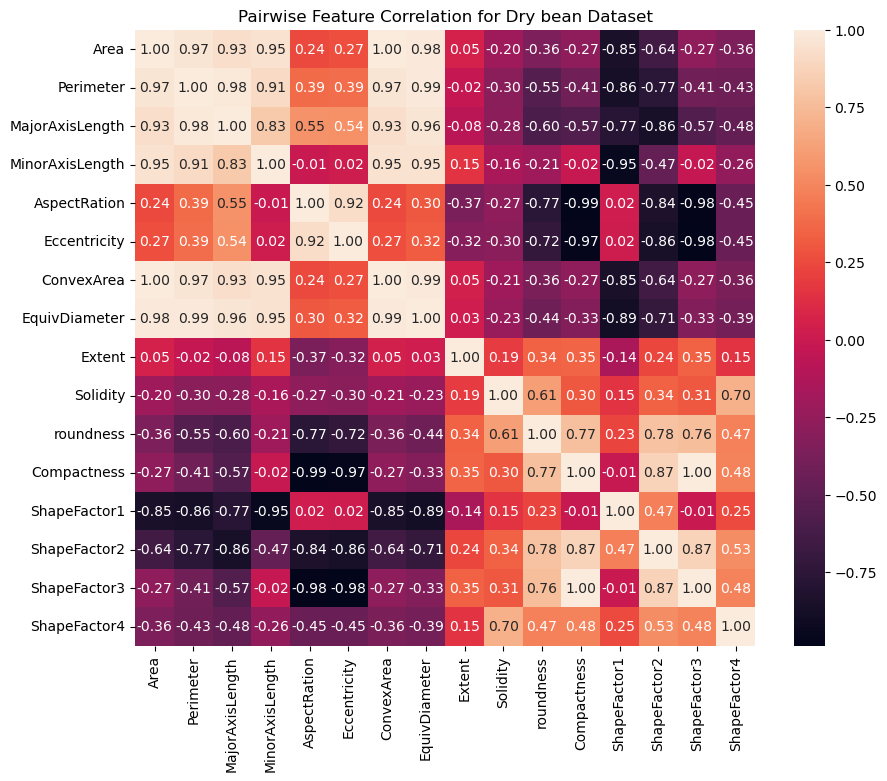

In [8]:
# Plot the heatmap for pairwise feature correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Pairwise Feature Correlation for Dry bean Dataset')
plt.show()

 # Select the features from the correlation matrix 

In [9]:
# Calculate the correlation matrix
correlation_matrix = dry_bean_df.drop(columns=['Class']).corr()

# Set the threshold for correlation
set_threshold = 0.4  

# Select features with correlation above the threshold
dry_bean_selected_features = correlation_matrix['Class_Encoded'].abs().sort_values(ascending=False)
dry_bean_selected_features = dry_bean_selected_features[dry_bean_selected_features > set_threshold].index.tolist()

# Print selected features
print("Selected Features based on correlation with 'Class':", dry_bean_selected_features[1:6])

Selected Features based on correlation with 'Class': ['Perimeter', 'EquivDiameter', 'ConvexArea', 'Area', 'MinorAxisLength']


 # Perform Train Split test

In [10]:
 #Extract the selected features along with the target variable
dry_bean_selected_data = dry_bean_df[dry_bean_selected_features]

# Split the data into features (X) and target variable (y) for dry bean dataset
X = dry_bean_selected_data.drop(columns=['Class_Encoded'])
y = dry_bean_selected_data['Class_Encoded']

In [11]:
# Perform train-test split by 70% 30% ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of train and test data
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (9527, 6)
Test data shape: (4084, 6)


In [12]:
print(X_train)

       Perimeter  EquivDiameter  ConvexArea    Area  MinorAxisLength  \
11380    651.194     196.123855       30507   30210       151.387457   
10592    603.446     185.373844       27389   26989       164.968662   
3130    1120.351     318.170913       80728   79508       248.306459   
5861     880.106     245.649985       48081   47394       165.751428   
3405    1465.758     430.175967      147256  145339       342.468755   
...          ...            ...         ...     ...              ...   
5191    1117.778     325.603384       84030   83266       237.747098   
13418    755.392     225.272077       40330   39857       179.430885   
5390    1156.599     338.521273       90790   90004       252.353553   
860      711.412     221.191100       38799   38426       198.555756   
7270     997.390     284.629032       64287   63628       204.033966   

       MajorAxisLength  
11380       254.800257  
10592       209.236366  
3130        410.471774  
5861        365.540272  
3405      

In [13]:
print(y_train)

11380    3
10592    3
3130     0
5861     4
3405     1
        ..
5191     2
13418    3
5390     2
860      5
7270     4
Name: Class_Encoded, Length: 9527, dtype: int64


In [14]:
print(X_test)

       Perimeter  EquivDiameter  ConvexArea   Area  MinorAxisLength  \
1488     741.226     232.180294       42676  42339       207.306394   
2611    1088.754     294.779204       70172  68247       237.863792   
749      708.716     219.544429       38232  37856       194.360324   
99       648.385     205.423899       33377  33143       189.737379   
11298    647.570     195.196551       30321  29925       161.004849   
...          ...            ...         ...    ...              ...   
1330     732.882     229.216557       41606  41265       205.674857   
11075    638.527     192.424217       29406  29081       155.204838   
6438     927.901     261.175296       54126  53574       181.843432   
957      711.477     222.516830       39192  38888       202.418598   
2110     940.760     262.769444       55277  54230       204.907323   

       MajorAxisLength  
1488        260.199330  
2611        370.368146  
749         248.430330  
99          222.526309  
11298       237.714031

In [15]:
print(y_test)

1488     5
2611     0
749      5
99       5
11298    3
        ..
1330     5
11075    3
6438     4
957      5
2110     0
Name: Class_Encoded, Length: 4084, dtype: int64


 # Applying Support Vector Machine Algorithm

In [16]:

# Support Vector Machine (SVM) classifier
svm_model = SVC()

# Training the Model
svm_model.fit(X_train, y_train)

# Making the predictions 
svm_predictions = svm_model.predict(X_test)

# Applying Decision Tree Classifier Algorithm

In [17]:
# Decision Tree classifier 
dtree_model = DecisionTreeClassifier()

# Training the Model
dtree_model.fit(X_train, y_train)

# Making the predictions 
dtree_predictions = dtree_model.predict(X_test)

# Applying RandomForest Classifier Algorithm¶

In [18]:
# Random Forest classifier
rfc_model = RandomForestClassifier()

# Training the Model
rfc_model.fit(X_train, y_train)

# Making the predictions 
rfc_predictions = rfc_model.predict(X_test)

# Applying KNeighborsClassifier Algorithm

In [19]:
# K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()

# Training the Model
knn_model.fit(X_train, y_train)

# Training the Model
knn_predictions = knn_model.predict(X_test)

# Applying the Heatmaps for Confusion Matrix

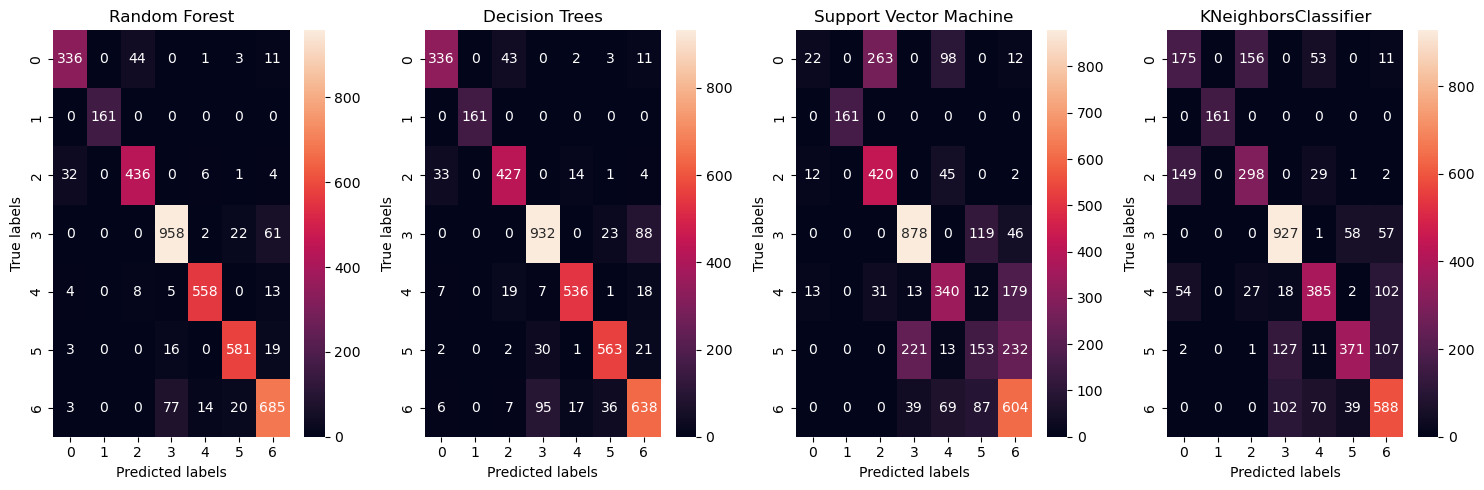

In [20]:

# Plot the confusion matrix
def plot_confusion_matrix(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Initialize a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot confusion matrix for each algorithm
algorithms = ['Random Forest', 'Decision Trees', 'Support Vector Machine', 'KNeighborsClassifier']
models = [rfc_model, dtree_model, svm_model, knn_model]

for i, (model, algorithm) in enumerate(zip(models, algorithms)):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plot_confusion_matrix(axes[i], conf_matrix, title=algorithm)

# Adjust layout
plt.tight_layout()
plt.show()


# Classification Report Comparison

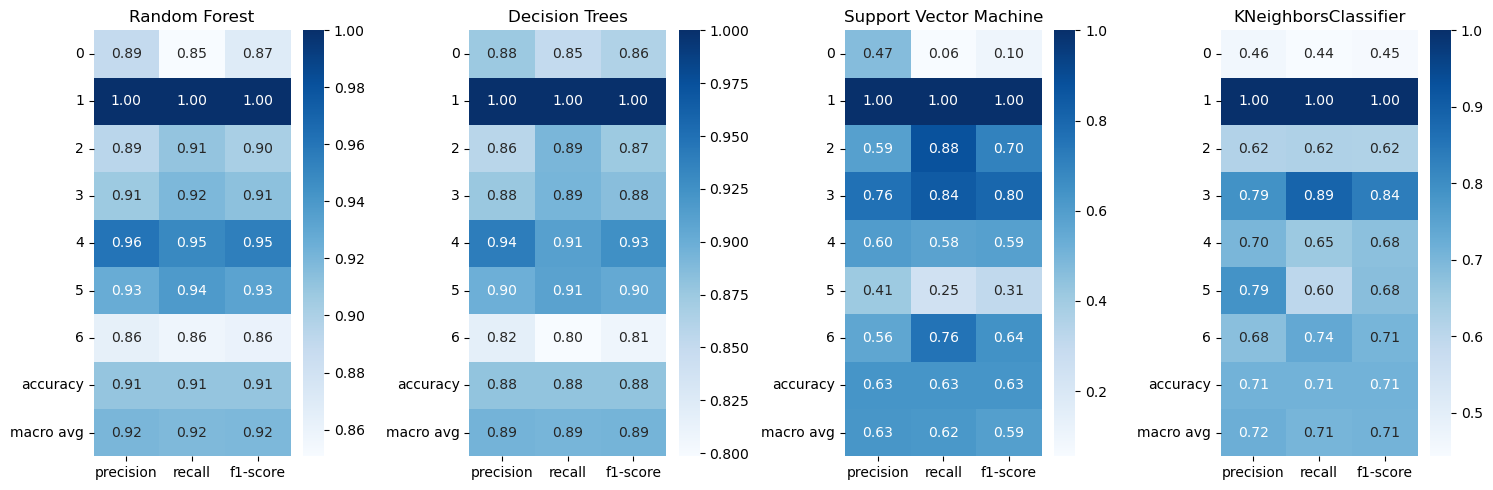

In [21]:

# Define a function to plot classification report
def plot_classification_report(ax, report, title):
    report_dry_bean_df = pd.DataFrame(report).transpose()
    sns.heatmap(report_dry_bean_df.iloc[:-1, :-1].astype(float), annot=True, cmap='Blues', fmt=".2f", ax=ax)
    ax.set_title(title)

# Initialize a figure with subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Plot classification report for each algorithm
algorithms = ['Random Forest', 'Decision Trees', 'Support Vector Machine', 'KNeighborsClassifier']
models = [rfc_model, dtree_model, svm_model,knn_model]


for i, (model, algorithm) in enumerate(zip(models, algorithms)):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Classification Report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Plot classification report
    plot_classification_report(axes[i], report, title=algorithm)

# Adjusting layout
plt.tight_layout()
plt.show()


# Accuracy score 

In [22]:
print("Support Vector Machine Accuracy score :", accuracy_score(y_test, svm_predictions))

Support Vector Machine Accuracy score : 0.6312438785504407


In [23]:
print("Random Forest Accuracy score :", accuracy_score(y_test, rfc_predictions))

Random Forest Accuracy score : 0.9096474045053868


In [24]:
print("Decision Tree Accuracy Score :", accuracy_score(y_test, dtree_predictions))

Decision Tree Accuracy Score : 0.8797747306562194


In [25]:
print("KNN Accuracy Score:", accuracy_score(y_test, knn_predictions))

KNN Accuracy Score: 0.7113124387855044


# Plot the graph to visualize for the four Algorithms

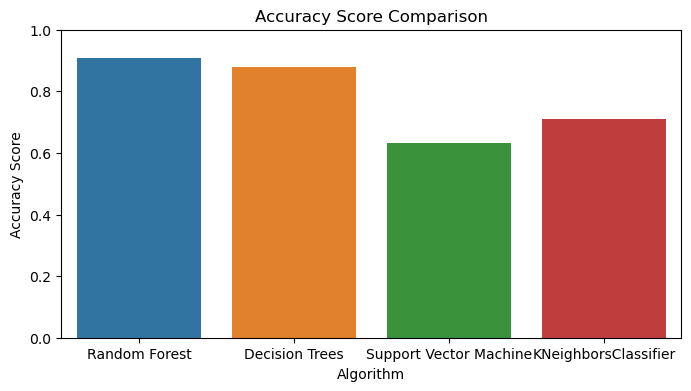

In [26]:
# Assign a list to store accuracy scores
accuracy_scores = []

# Evaluate accuracy score for each algorithm
algorithms = ['Random Forest', 'Decision Trees', 'Support Vector Machine', 'KNeighborsClassifier']
models = [rfc_model, dtree_model, svm_model, knn_model]  
for model, algorithm in zip(models, algorithms):
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plot a barplot to visualize accuracy scores
plt.figure(figsize=(8, 4))
sns.barplot(x=algorithms, y=accuracy_scores)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')


# Set y-axis limit to 0-1 for accuracy score
plt.ylim(0, 1)  
plt.show()
